<center><h1>2nd set: Segmentation exercises - S1a y S1b</h1></b>
<h2>IPAC - 2021</h2></b>
<h3>Allison Fernández Lobo - MUSS Program</h3></b></center>

In [10]:
# Import the libraries.
import cv2  
import numpy as np  
import random
import matplotlib.pyplot as plt

### S1a. Contour Extraction.

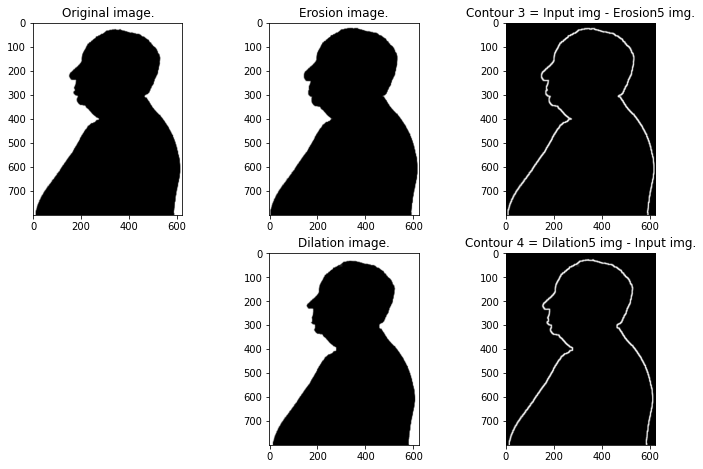

In [22]:
# Read the input image.
img = cv2.imread(r'./Input Images/hitchcock.png', 0)  

# Define the kernel.
kernel = np.ones((3,3), np.uint8)  

# Operations.
img_erosion = cv2.erode(img, kernel, iterations=1)  
img_dilation = cv2.dilate(img, kernel, iterations=1) 
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Obtain the contour. 
img_contour1 = img - img_erosion
img_contour2 = img_dilation - img

#cv2.imshow('Input', img_contour2)  
#cv2.imshow('Dilation', img_contour)  
#cv2.waitKey(0) 

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.title("Original image.")
plt.imshow(img,cmap = 'gray');

plt.subplot(3,3,2)
plt.title("Erosion image.")
plt.imshow(img_erosion,cmap = 'gray')

plt.subplot(3,3,3)
plt.title("Contour 3 = Input img - Erosion img.")
plt.imshow(img_contour1,cmap = 'gray')

plt.subplot(3,3,5)
plt.title("Dilation image.")
plt.imshow(img_dilation,cmap = 'gray')

plt.subplot(3,3,6)
plt.title("Contour 4 = Dilation img - Input img.")
plt.imshow(img_contour2,cmap = 'gray')
#plt.savefig('./Output Images/S1a Boundary.png')

### S1b. Grassfire algorithm.

Lenna.png


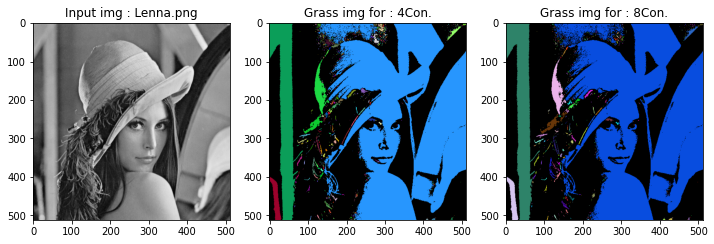

particles.png


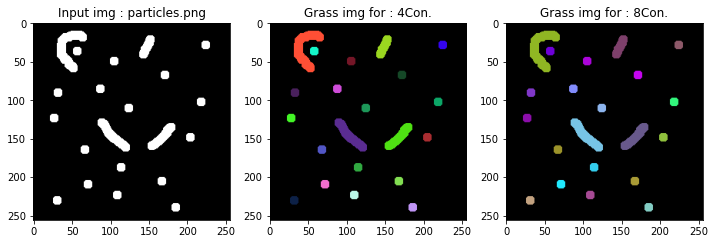

wheel.png


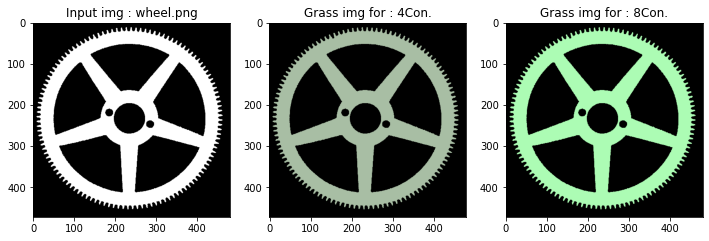

Zebra.jpeg


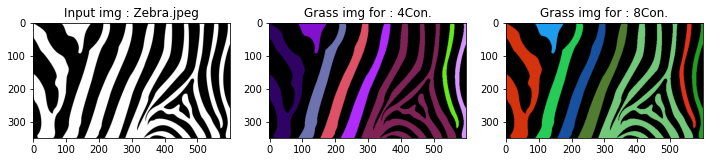

In [46]:
def GrassAlgorithm(image, conn):
    # Threshold operation for the black pixels.
    _, imageTh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    # Gray Image to Color Image.
    out = cv2.cvtColor(imageTh, cv2.COLOR_GRAY2BGR)
    height, width = imageTh.shape
    # In order to manage the borders, the mask is +2 pixels bigger in each side. 
    mask = np.zeros((height+2, width+2), np.uint8)
    for i in range(height):
        for j in range(width):
            if(imageTh[i,j] == 255):
                # Generate random color for the region.
                r = random.randint(0,255)
                g = random.randint(0,255)
                b = random.randint(0,255)
                # Identify the connections and assign the random color.
                cv2.floodFill(out, mask, (j,i), (b,g,r), flags = conn)
    return out

imgSet = ["Lenna.png", "particles.png", "wheel.png", "Zebra.jpeg"]
for imgName in imgSet:
    print(imgName)
    img = cv2.imread('./Input Images/'+imgName, cv2.IMREAD_GRAYSCALE)
    img4 = GrassAlgorithm(img, 4)
    img8 = GrassAlgorithm(img, 8)
    plt.figure(figsize=(12,12));
    plt.subplot(1,3,1); plt.imshow(img, cmap = 'gray');plt.title('Input img : ' + imgName);
    plt.subplot(1,3,2); plt.imshow(img4);plt.title('Grass img for : 4Con.');
    plt.subplot(1,3,3); plt.imshow(img8);plt.title('Grass img for : 8Con.');
    #plt.savefig('./Output Images/S1b.Grassfire-'+imgName+'.png')
    plt.show()